In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
test_path = '../data/test/test.csv'
train_path = '../data/train/train.csv'

test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)
print('Dataframes Loaded ✅')

Dataframes Loaded ✅


In [4]:
train_df.head(24)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      13903 non-null  object 
 1   season      13903 non-null  int64  
 2   yr          13903 non-null  int64  
 3   mnth        13903 non-null  int64  
 4   hr          13903 non-null  int64  
 5   holiday     13903 non-null  int64  
 6   weekday     13903 non-null  int64  
 7   workingday  13903 non-null  int64  
 8   weathersit  13903 non-null  int64  
 9   temp        13903 non-null  float64
 10  atemp       13903 non-null  float64
 11  hum         13903 non-null  float64
 12  windspeed   13903 non-null  float64
 13  cnt         13903 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.5+ MB


In [6]:
train_df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<mark>dates</mark>

In [7]:
train_df.rename(columns={'dteday':'date'}, inplace=True);

In [8]:
train_df['date'] = pd.to_datetime(train_df['date']);

In [9]:
#incorporating hours back into data
train_df['date'] = pd.to_datetime(train_df['date'].astype(str) + ' ' + train_df['hr'].astype(str) + ':00')

In [10]:
min_date = train_df['date'].min()
max_date = train_df['date'].max()
date_difference = max_date - min_date
print(f'Dates range from {min_date} to {max_date} in the train_df, which is a total of {date_difference}')

Dates range from 2011-01-01 00:00:00 to 2012-08-07 11:00:00 in the train_df, which is a total of 584 days 11:00:00


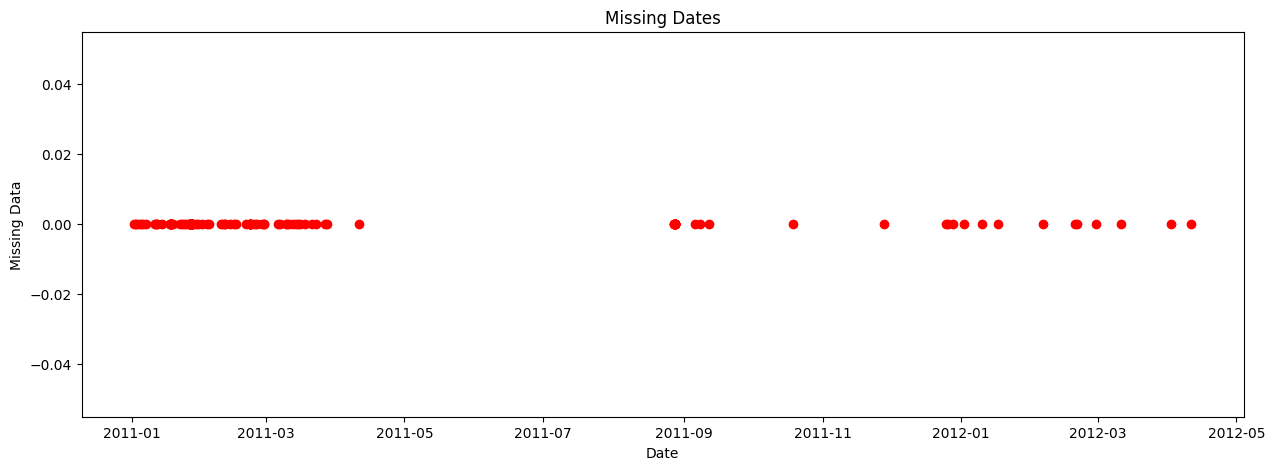

In [11]:
full_range_dates = pd.date_range(start=train_df['date'].min(), end=train_df['date'].max(), freq='h')

# visualize hours not covered by measurement data
missing_dates = full_range_dates[~full_range_dates.isin(train_df['date'])]
plt.figure(figsize=(15, 5))
plt.plot(missing_dates, [0] * len(missing_dates), 'ro')
plt.title('Missing Dates')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.show()

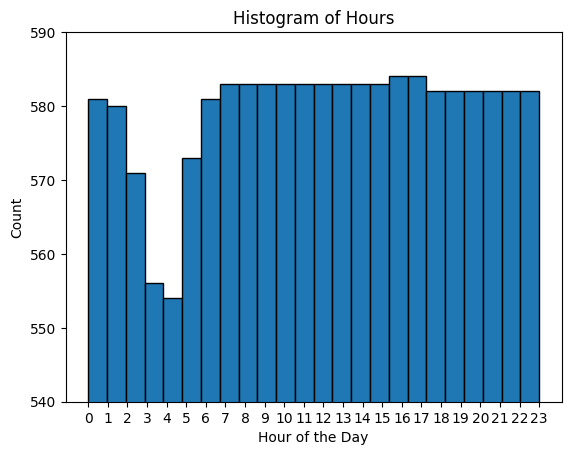

In [12]:
plt.hist(train_df['hr'], bins=24, range=(0,23), edgecolor='black')
plt.title('Histogram of Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.ylim([540,590])
plt.xticks(range(24));

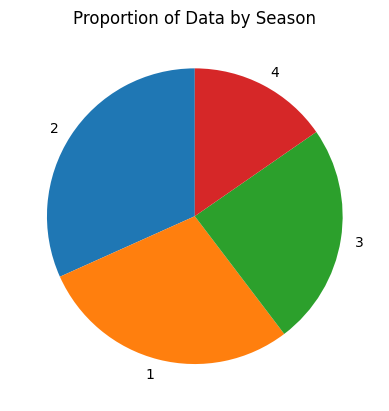

In [13]:
season_counts = train_df['season'].value_counts()
plt.pie(season_counts, labels=season_counts.index, startangle=90)
plt.title('Proportion of Data by Season');

In [14]:
train_df.columns

Index(['date', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

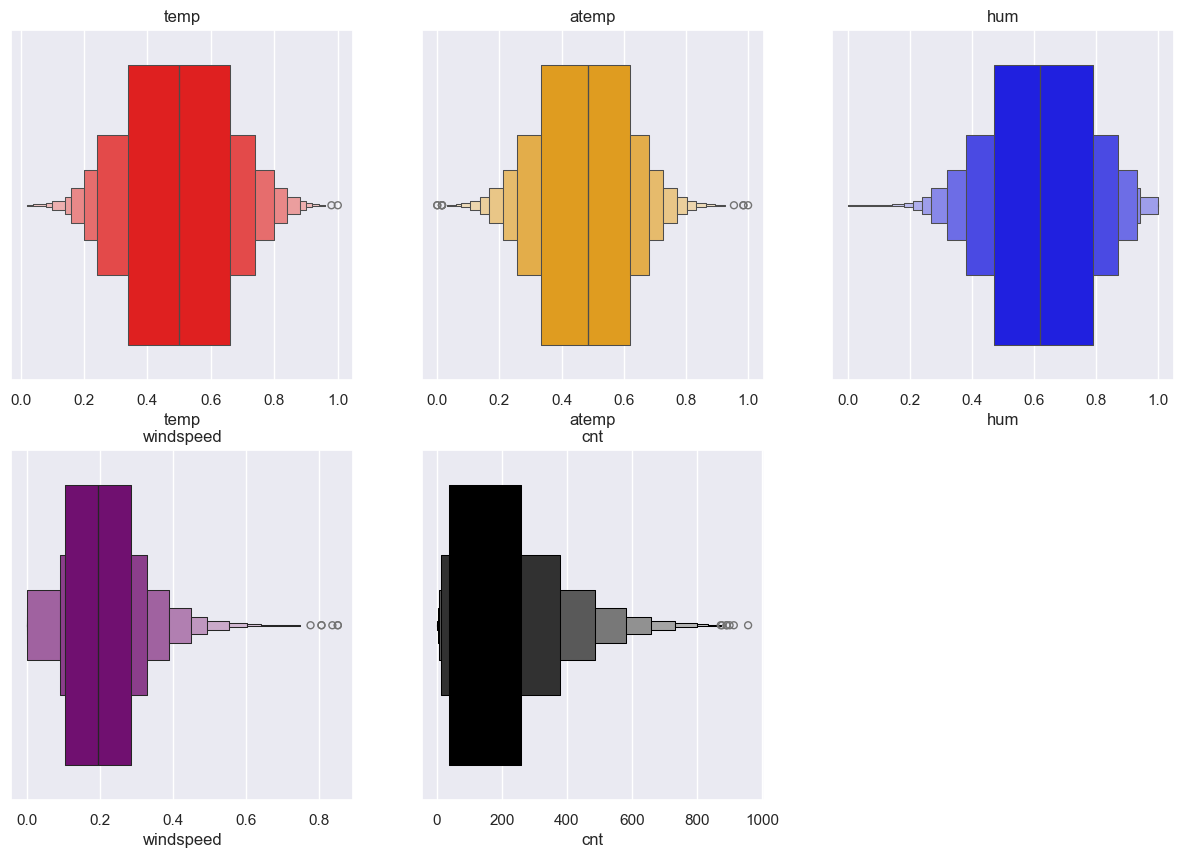

In [15]:
boxplot_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

sns.set_theme(style='darkgrid')
sns.color_palette('deep')
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxenplot(data=train_df, x=train_df['temp'], color='red');
plt.title('temp')

plt.subplot(2,3,2)
sns.boxenplot(data=train_df, x=train_df['atemp'], color='orange');
plt.title('atemp')

plt.subplot(2,3,3)
sns.boxenplot(data=train_df, x=train_df['hum'], color='blue');
plt.title('hum')

plt.subplot(2,3,4)
sns.boxenplot(data=train_df, x=train_df['windspeed'], color='purple');
plt.title('windspeed')

plt.subplot(2,3,5)
sns.boxenplot(data=train_df, x=train_df['cnt'], color='black');
plt.title('cnt');

<mark>hourly statistics</mean>

In [16]:
train_df['hourly_cnt_mean'] = train_df.groupby('hr')['cnt'].transform('mean')
train_df['hourly_cnt_median'] = train_df.groupby('hr')['cnt'].transform('median')
train_df['hourly_cnt_std'] = train_df.groupby('hr')['cnt'].transform('std')
train_df['hourly_cnt_90th'] = train_df.groupby('hr')['cnt'].quantile(0.9)
train_df['hourly_cnt_10th'] = train_df.groupby('hr')['cnt'].quantile(0.1)
train_df['cnt_zscore'] = (train_df['cnt'] - train_df['cnt'].mean()) / train_df['cnt'].std()




<Axes: >

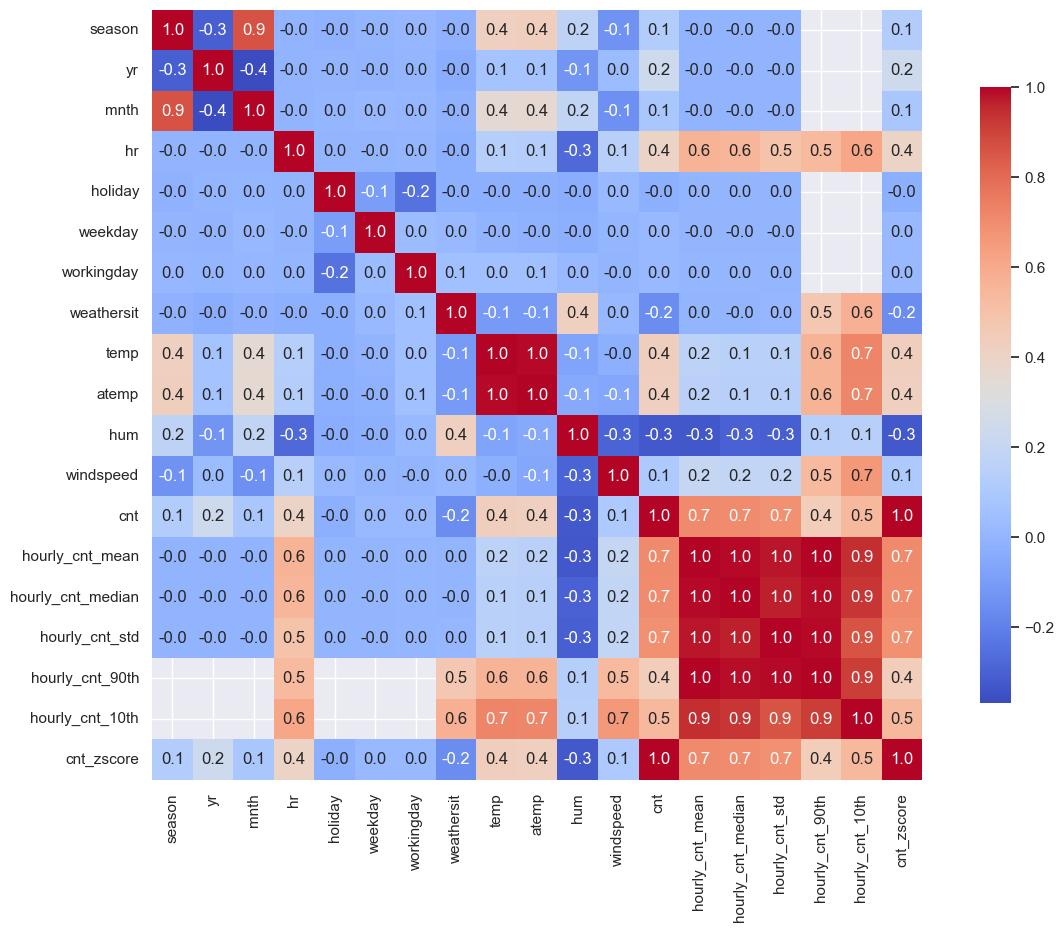

In [17]:
correlation = train_df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [18]:
train_df.columns

Index(['date', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'hourly_cnt_mean', 'hourly_cnt_median', 'hourly_cnt_std',
       'hourly_cnt_90th', 'hourly_cnt_10th', 'cnt_zscore'],
      dtype='object')

In [19]:
train_df.mean()

date                 2011-10-21 22:03:58.739840512
season                                    2.263828
yr                                        0.378192
mnth                                      5.650147
hr                                       11.546573
holiday                                   0.027404
weekday                                   2.999425
workingday                                0.684457
weathersit                                1.419981
temp                                       0.49917
atemp                                     0.478017
hum                                       0.622996
windspeed                                 0.194097
cnt                                     174.639143
hourly_cnt_mean                         174.639143
hourly_cnt_median                       165.598432
hourly_cnt_std                          100.380066
hourly_cnt_90th                         311.233333
hourly_cnt_10th                          53.958333
cnt_zscore                     

In [20]:
hourly_stats = train_df.groupby('hr')['cnt'].agg(
                mean='mean',
                median='median',
                std='std',
                q90=lambda x: x.quantile(0.9),
                q10=lambda x: x.quantile(0.1)
            ).reset_index()
hourly_stats_dict = {col: dict(zip(hourly_stats['hr'], hourly_stats[col]))
                     for col in hourly_stats.columns if col != 'hr'}

print(hourly_stats_dict)

{'mean': {0: 50.056798623063685, 1: 30.836206896551722, 2: 21.506129597197898, 3: 11.118705035971223, 4: 5.765342960288809, 5: 17.701570680628272, 6: 69.80378657487091, 7: 193.71355060034304, 8: 327.80789022298455, 9: 201.49571183533448, 10: 159.2607204116638, 11: 189.72727272727272, 12: 229.70497427101202, 13: 231.37907375643223, 14: 219.98970840480274, 15: 228.40308747855917, 16: 283.9075342465753, 17: 425.0308219178082, 18: 395.48625429553266, 19: 291.74570446735396, 20: 212.90549828178695, 21: 163.43986254295532, 22: 124.8213058419244, 23: 82.15292096219932}, 'median': {0: 38.0, 1: 18.0, 2: 11.0, 3: 6.0, 4: 5.0, 5: 17.0, 6: 71.0, 7: 188.0, 8: 353.0, 9: 202.0, 10: 135.0, 11: 164.0, 12: 204.0, 13: 203.0, 14: 187.0, 15: 198.0, 16: 284.5, 17: 427.0, 18: 390.0, 19: 288.5, 20: 206.5, 21: 162.5, 22: 119.5, 23: 73.0}, 'std': {0: 38.92842959102218, 1: 30.648754990679613, 2: 24.788534720515305, 3: 12.47571807084104, 4: 3.8870803262391806, 5: 11.552250453294475, 6: 50.57850899190315, 7: 147.1